<a href="https://colab.research.google.com/github/dima1234567898765/rgz/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_7_%D0%91%D0%BE%D0%B1%D0%BE%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Задание 1
# Импортируем необходимые библиотеки
from sklearn.datasets import fetch_openml
import numpy as np

# Загрузим часть набора данных Fashion MNIST
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)

# Получим данные и метки
X, y = fashion_mnist["data"], fashion_mnist["target"].astype(np.int64)

# Используем только первую 1000 строк для тестирования
X, y = X[:1000], y[:1000]

# Нормализуем данные (преобразуем значения пикселей от 0-255 к диапазону 0-1)
X = X / 255.0

# Разделим данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные (нормализация)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Инициализируем модель SVM
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear', random_state=42)

# Обучаем модель
svm_clf.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = svm_clf.predict(X_test)

# Оцениваем качество модели
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        24
           1       0.90      0.95      0.93        20
           2       0.52      0.80      0.63        15
           3       0.72      0.62      0.67        21
           4       0.50      0.31      0.38        13
           5       0.89      0.89      0.89        18
           6       0.71      0.43      0.54        23
           7       0.96      0.92      0.94        24
           8       0.94      1.00      0.97        17
           9       0.92      0.92      0.92        25

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.79      0.78      0.77       200



In [ ]:
#Задание 2
# Импортируем необходимые библиотеки
# Установим пакет openml
!pip install openml

# Импортируем необходимые библиотеки
import openml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Загрузим набор данных Fashion MNIST
fashion_mnist = openml.datasets.get_dataset(40996)

# Получим данные и метки
X, y, _, _ = fashion_mnist.get_data(target=fashion_mnist.default_target_attribute)

# Нормализуем данные (преобразуем значения пикселей от 0-255 к диапазону 0-1)
X = X / 255.0

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные (нормализация)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Инициализируем модель SVM
svm_clf = SVC(kernel='linear', random_state=42)

# Обучаем модель
svm_clf.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = svm_clf.predict(X_test)

# Оцениваем качество модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.3 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=22368414dc090b0ca8a906857e653f9c26da485e0da17302680c8b55d77870ab
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=a2cc681d63c66a9330b4f0c3b6cde6dafb99004ded74e9b4a556098eb69fd23f
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built

<ipython-input-2-ee4416456433>:15: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  fashion_mnist = openml.datasets.get_dataset(40996)


Accuracy: 0.846
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1394
           1       0.96      0.97      0.96      1402
           2       0.74      0.77      0.75      1407
           3       0.85      0.84      0.85      1449
           4       0.75      0.77      0.76      1357
           5       0.93      0.94      0.94      1449
           6       0.66      0.58      0.62      1407
           7       0.91      0.93      0.92      1359
           8       0.95      0.90      0.93      1342
           9       0.96      0.93      0.94      1434

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000



In [ ]:
#Задание 3
# Установим пакет openml
!pip install openml

# Импортируем необходимые библиотеки
import openml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Загрузим набор данных Fashion MNIST
fashion_mnist = openml.datasets.get_dataset(40996)

# Получим данные и метки
X, y, _, _ = fashion_mnist.get_data(target=fashion_mnist.default_target_attribute)

# Используем только первые 5000 строк для ускорения обработки
X, y = X[:5000], y[:5000]

# Нормализуем данные (преобразуем значения пикселей от 0-255 к диапазону 0-1)
X = X / 255.0

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные (нормализация)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Инициализируем модель SVM
svm_clf = SVC(kernel='linear', random_state=42)

# Обучаем модель
svm_clf.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = svm_clf.predict(X_test)

# Оцениваем качество модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


<ipython-input-3-4581b37dc3ac>:14: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  fashion_mnist = openml.datasets.get_dataset(40996)


Accuracy: 0.811
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        81
           1       0.94      0.98      0.96        95
           2       0.64      0.66      0.65       103
           3       0.82      0.83      0.82        93
           4       0.79      0.66      0.72       117
           5       0.90      0.93      0.92        99
           6       0.47      0.51      0.49        88
           7       0.93      0.92      0.92       106
           8       0.97      0.93      0.95       103
           9       0.96      0.95      0.95       115

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



In [ ]:
#Задание 4
# Установим пакет openml
!pip install openml

# Импортируем необходимые библиотеки
import openml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Загрузим набор данных Fashion MNIST
fashion_mnist = openml.datasets.get_dataset(40996)

# Получим данные и метки
X, y, _, _ = fashion_mnist.get_data(target=fashion_mnist.default_target_attribute)

# Используем только первые 5000 строк для ускорения обработки
X, y = X[:5000], y[:5000]

# Нормализуем данные (преобразуем значения пикселей от 0-255 к диапазону 0-1)
X = X / 255.0

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные (нормализация)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Инициализируем модель SVM
svm_clf = SVC(kernel='linear', random_state=42)

# Обучаем модель на обучающем наборе данных
svm_clf.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = svm_clf.predict(X_test)

# Оцениваем качество модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


<ipython-input-4-76925be3e485>:14: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  fashion_mnist = openml.datasets.get_dataset(40996)


Accuracy: 0.811
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        81
           1       0.94      0.98      0.96        95
           2       0.64      0.66      0.65       103
           3       0.82      0.83      0.82        93
           4       0.79      0.66      0.72       117
           5       0.90      0.93      0.92        99
           6       0.47      0.51      0.49        88
           7       0.93      0.92      0.92       106
           8       0.97      0.93      0.95       103
           9       0.96      0.95      0.95       115

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.7 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=a9d704788cf694fc9c4a627d5d69fa85d106995c27c6fade21c847a71a93fd2b
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=7096482d130872fb36b5f01dcfe9f9bb0cc33af55f3353607e3c441b0c51a9e8
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully buil

<ipython-input-2-1de826811d78>:16: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  fashion_mnist = openml.datasets.get_dataset(40996)


Accuracy: 0.811
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        81
           1       0.94      0.98      0.96        95
           2       0.64      0.66      0.65       103
           3       0.82      0.83      0.82        93
           4       0.79      0.66      0.72       117
           5       0.90      0.93      0.92        99
           6       0.47      0.51      0.49        88
           7       0.93      0.92      0.92       106
           8       0.97      0.93      0.95       103
           9       0.96      0.95      0.95       115

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



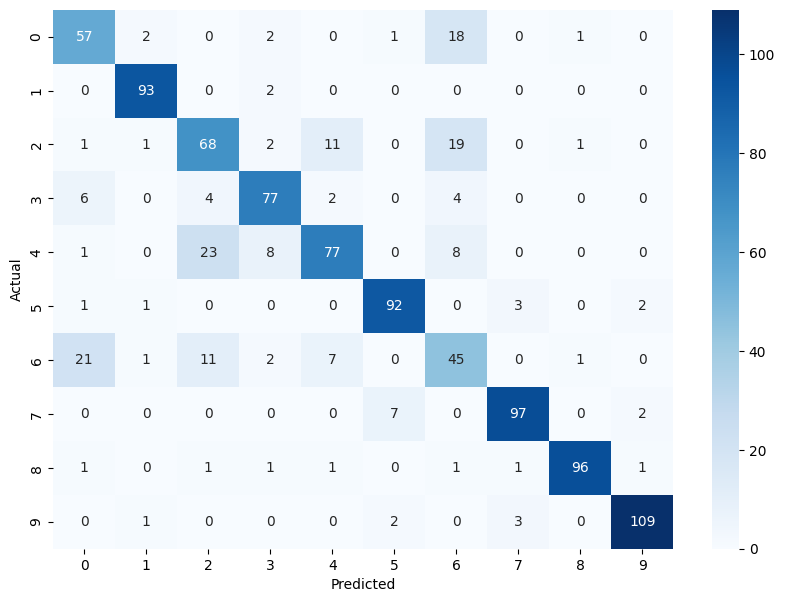

Best parameters: {'C': 100, 'kernel': 'rbf'}
Optimized Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        81
           1       0.97      0.98      0.97        95
           2       0.70      0.74      0.72       103
           3       0.91      0.89      0.90        93
           4       0.86      0.78      0.82       117
           5       0.94      0.93      0.93        99
           6       0.60      0.56      0.58        88
           7       0.95      0.89      0.92       106
           8       0.90      0.97      0.93       103
           9       0.92      0.95      0.93       115

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000



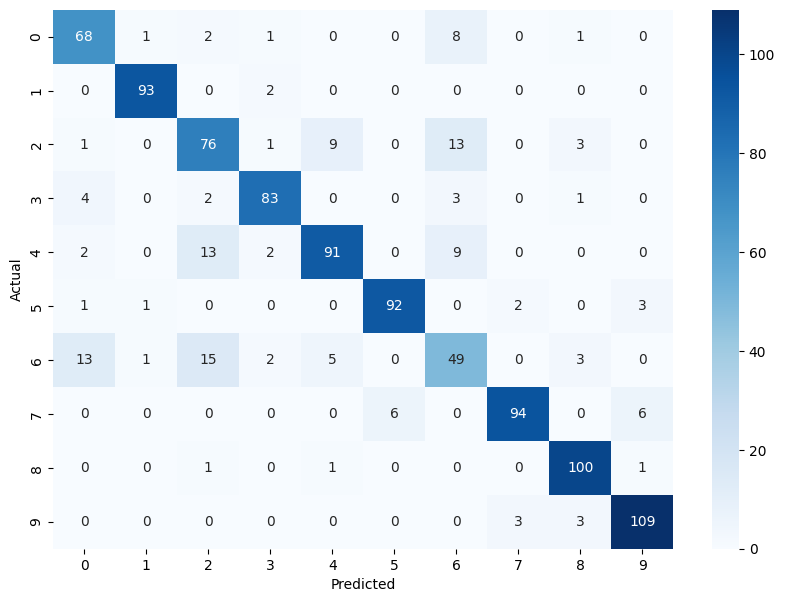

In [ ]:
#Задание 5
# Установим пакет openml
!pip install openml

# Импортируем необходимые библиотеки
import openml
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузим набор данных Fashion MNIST
fashion_mnist = openml.datasets.get_dataset(40996)

# Получим данные и метки
X, y, _, _ = fashion_mnist.get_data(target=fashion_mnist.default_target_attribute)

# Используем только первые 5000 строк для ускорения обработки
X, y = X[:5000], y[:5000]

# Нормализуем данные (преобразуем значения пикселей от 0-255 к диапазону 0-1)
X = X / 255.0

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные (нормализация)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Инициализируем модель SVM
svm_clf = SVC(kernel='linear', random_state=42)

# Обучаем модель на обучающем наборе данных
svm_clf.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = svm_clf.predict(X_test)

# Оцениваем качество модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Выводим матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Оптимизация гиперпараметров с помощью Grid Search
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Best parameters:", grid_search.best_params_)

# Обучаем модель с лучшими параметрами
best_svm_clf = grid_search.best_estimator_
best_svm_clf.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке с оптимизированной моделью
y_pred_best = best_svm_clf.predict(X_test)

# Оцениваем качество оптимизированной модели
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Выводим матрицу ошибок для оптимизированной модели
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.7725000000000001
Optimized Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       1.00      1.00      1.00        11
           2       0.70      0.70      0.70        10
           3       0.88      0.70      0.78        10
           4       0.82      0.90      0.86        10
           5       0.90      0.90      0.90        10
           6       0.58      0.70      0.64        10
           7       0.80      0.80      0.80        10
           8       1.00      0.90      0.95        10
           9       0.82      0.90      0.86        10

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



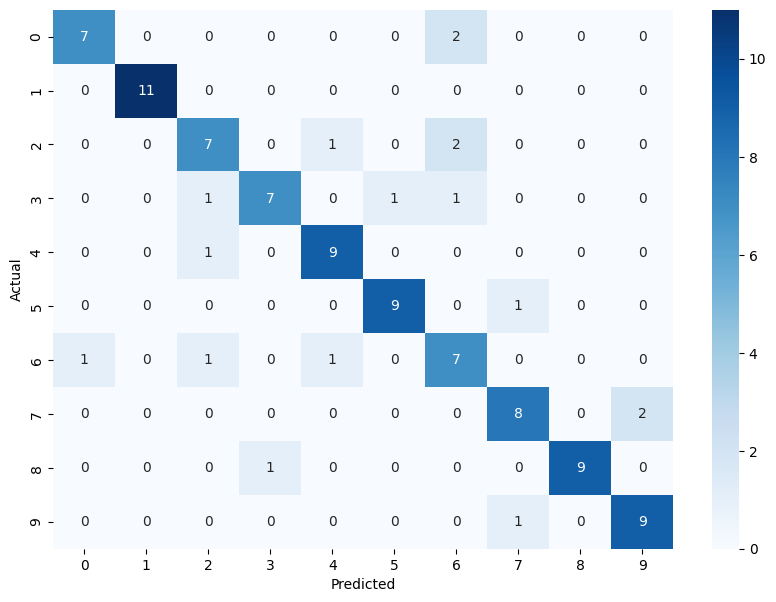

In [ ]:
#Задание 6
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и тестовый наборы (10%)
X_small, _, y_small, _ = train_test_split(X, y, train_size=0.1, stratify=y)

# Разделение обучающего набора на обучающий и тестовый наборы
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, stratify=y_small)

# Определение сетки параметров для Grid Search
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}
]

# Создание Grid Search объекта
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Выполнение Grid Search на обучающих данных
grid_search.fit(X_train_small, y_train_small)

# Вывод результатов Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Оценка на тестовом наборе данных с лучшими параметрами
best_svm_clf = grid_search.best_estimator_
y_pred_best = best_svm_clf.predict(X_test_small)
print("Optimized Accuracy:", accuracy_score(y_test_small, y_pred_best))
print(classification_report(y_test_small, y_pred_best))
conf_matrix_best = confusion_matrix(y_test_small, y_pred_best)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#Задание 7 и 8
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Определение сетки параметров для Grid Search
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}
]

# Создание Grid Search объекта с кросс-валидацией (cv=5)
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Выполнение Grid Search на всем наборе данных (X, y)
grid_search.fit(X, y)

# Вывод результатов Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.8554


Задание 9 не относится к моему варианту

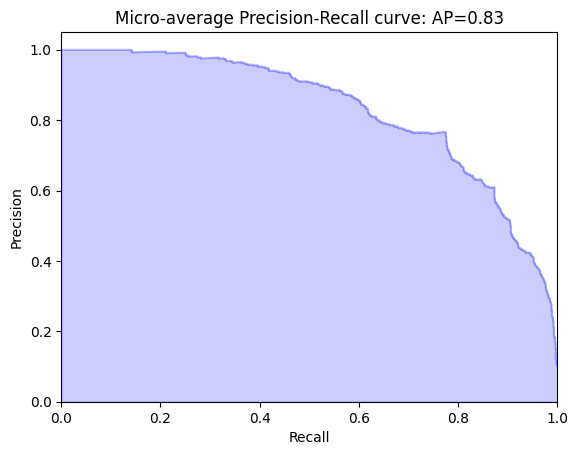

In [ ]:
#Задание 10
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# Конвертируем метки в бинарный формат
y_binary = label_binarize(y_test, classes=np.unique(y_test))

# Создаем бинарный классификатор с использованием OneVsRestClassifier
binary_clf = OneVsRestClassifier(best_svm_clf)

# Обучаем
binary_clf.fit(X_train, y_train)

# Вычисляем функцию решения для бинарной классификации
y_scores_binary = binary_clf.decision_function(X_test)

# Вычисляем кривую Precision-Recall для каждого класса
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_binary[:, i], y_scores_binary[:, i])
    average_precision[i] = average_precision_score(y_binary[:, i], y_scores_binary[:, i])

# Вычисляем микро-усредненную кривую Precision-Recall и ее оценку
precision["micro"], recall["micro"], _ = precision_recall_curve(y_binary.ravel(), y_scores_binary.ravel())
average_precision["micro"] = average_precision_score(y_binary, y_scores_binary, average="micro")

#  Строим микро-усредненную кривую Precision-Recall
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Micro-average Precision-Recall curve: AP={0:0.2f}'.format(average_precision["micro"]))
plt.show()



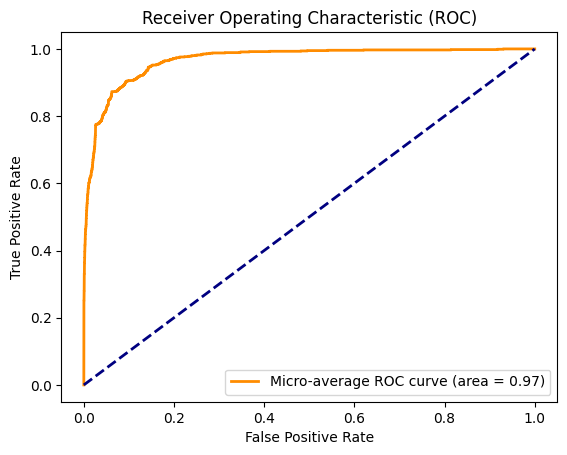

In [ ]:
#Задание 10
from sklearn.metrics import roc_curve, auc

# Преобразуем метки в двоичный формат
y_binary = label_binarize(y_test, classes=np.unique(y_test))

# Создаем двоичный классификатор, используя OneVsRestClassifier
binary_clf = OneVsRestClassifier(best_svm_clf)

# Обучаем
binary_clf.fit(X_train, y_train)

# Вычисляем решающую функцию для двоичной классификации
y_scores_binary = binary_clf.decision_function(X_test)

# Вычисляем кривую ROC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_binary[:, i], y_scores_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Вычислим микроусредненную кривую ROC и ее AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_binary.ravel(), y_scores_binary.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Построим кривую ROC для микроусреднения
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
